# **Sike AI Challenge**

A Jupyter Notebook for visualization and analysis of crime cata in Los Angeles Since 2010.

Created by John Dang

## Data Sources:

* [Crime Data](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/y8tr-7khq)
* [LAPD Divions Shapfiles](http://boundaries.latimes.com/sets/)
* [Populations of LAPD Divisions](http://www.lapdonline.org/inside_the_lapd/content_basic_view/1063)

In [2]:
import pandas as pd
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Read crime data into pandas dataframe
crime_df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [4]:
#Display crime data frame and dimensions
print("Crime Data Frame Dimensions: " + str(crime_df.shape))
crime_df.head()

Crime Data Frame Dimensions: (1841205, 26)


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


## How dangerous is West LA?

In [5]:
# List 21 LAPD divisions
print("The number of LAPD divisions is " + str(len(crime_df["Area Name"].unique())) + ". \n")
LAPD_div = crime_df["Area Name"].unique()
print(LAPD_div)

The number of LAPD divisions is 21. 

['77th Street' 'Olympic' 'Southeast' 'Topanga' 'Central' 'Northeast'
 'Foothill' 'Mission' 'Van Nuys' 'Newton' 'N Hollywood' 'West Valley'
 'Pacific' 'Devonshire' 'Rampart' 'Southwest' 'Hollenbeck' 'Harbor'
 'Hollywood' 'West LA' 'Wilshire']


In [6]:
#Create dictionary of crime codes to crime description
crime_dict = pd.Series(crime_df["Crime Code Description"].values,index=crime_df["Crime Code"]).to_dict()
crime_dict

{626: 'INTIMATE PARTNER - SIMPLE ASSAULT',
 510: 'VEHICLE - STOLEN',
 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 110: 'CRIMINAL HOMICIDE',
 668: 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
 440: 'THEFT PLAIN - PETTY ($950 & UNDER)',
 763: 'STALKING',
 442: 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 624: 'BATTERY - SIMPLE ASSAULT',
 670: 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
 649: 'DOCUMENT FORGERY / STOLEN FELONY',
 480: 'BIKE - STOLEN',
 210: 'ROBBERY',
 821: 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
 220: 'ATTEMPTED ROBBERY',
 437: 'RESISTING ARREST',
 888: 'TRESPASSING',
 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 660: 'COUNTERFEIT',
 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 647: 'THROWING OBJECT AT MOVING VEHICLE',
 951: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
 930: 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 330: 'BURGLARY FROM VEH

In [7]:
# create dictionary for number of crimes in each LAPD patrol division
num_crimes_dict = {}
for n in LAPD_div:
    division_df = crime_df.loc[crime_df["Area Name"] == n]
    if n == "West LA":
        n = "West Los Angeles"
    if n == "N Hollywood":
        n = "North Hollywood"
    num_crimes_dict[n] = division_df.shape[0]
num_crimes_dict

{'77th Street': 127639,
 'Olympic': 82403,
 'Southeast': 96801,
 'Topanga': 85297,
 'Central': 81336,
 'Northeast': 88199,
 'Foothill': 70119,
 'Mission': 91900,
 'Van Nuys': 87555,
 'Newton': 86666,
 'North Hollywood': 99760,
 'West Valley': 78438,
 'Pacific': 97484,
 'Devonshire': 85056,
 'Rampart': 77784,
 'Southwest': 118406,
 'Hollenbeck': 67468,
 'Harbor': 81172,
 'Hollywood': 84980,
 'West Los Angeles': 77221,
 'Wilshire': 75521}

In [9]:
print(num_crimes_dict)

{'77th Street': 127639, 'Olympic': 82403, 'Southeast': 96801, 'Topanga': 85297, 'Central': 81336, 'Northeast': 88199, 'Foothill': 70119, 'Mission': 91900, 'Van Nuys': 87555, 'Newton': 86666, 'North Hollywood': 99760, 'West Valley': 78438, 'Pacific': 97484, 'Devonshire': 85056, 'Rampart': 77784, 'Southwest': 118406, 'Hollenbeck': 67468, 'Harbor': 81172, 'Hollywood': 84980, 'West Los Angeles': 77221, 'Wilshire': 75521}


In [10]:
population_dict = {"77th Street": 175000, "Central": 40000, "Devonshire": 219136, "Foothill": 182214, "Harbor": 171000, "Hollenbeck": 200000, "Hollywood": 300000, "Mission": 225849, "Newton": 150000, "Northeast": 250000, "North Hollywood": 220000, "Olympic": 250000, "Pacific": 200000, "Rampart": 164961, "Southeast": 150000, "Southwest": 165000, "Topanga": 216490, "Van Nuys": 325000, "West Los Angeles": 228000, "West Valley": 196840, "Wilshire": 251000}

Text(0.5, 0, 'LAPD Division')

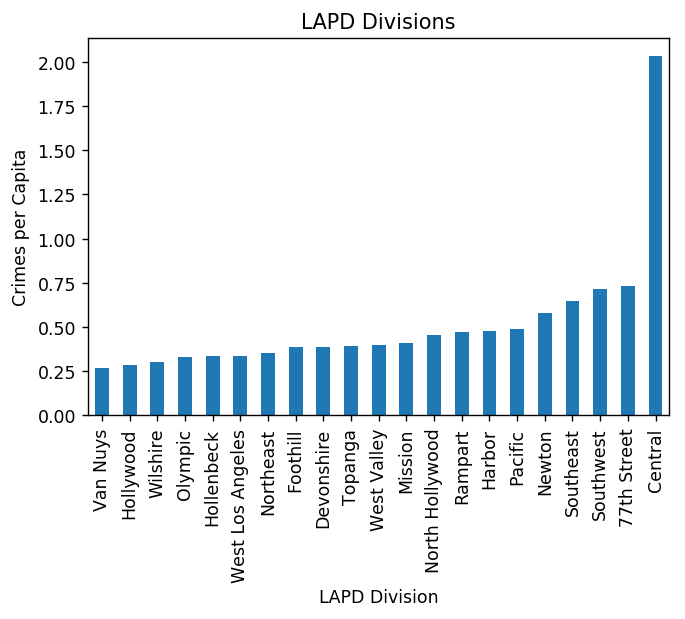

In [34]:
# create dictionary with crimes per capita for each LAPD division
crimes_per_capita_dict = {}
for n in num_crimes_dict:
    crimes_per_capita_dict[n] = num_crimes_dict[n] / population_dict[n]
cpc_df = pd.DataFrame({"name": list(crimes_per_capita_dict.keys()), "count": list(crimes_per_capita_dict.values())})


plt.figure(dpi = 125)
plt.ylabel("Crimes per Capita")
plt.title("LAPD Divisions")
cpc_df.sort_values("count").plot(x="name",kind="bar",ax = plt.gca(), sort_columns=True, legend=False)
plt.xlabel("LAPD Division")

In [13]:
# load LAPD division shapefile into geopandas
LAPDdiv_df = gp.read_file("lapd-divisions/lapd division.shx")

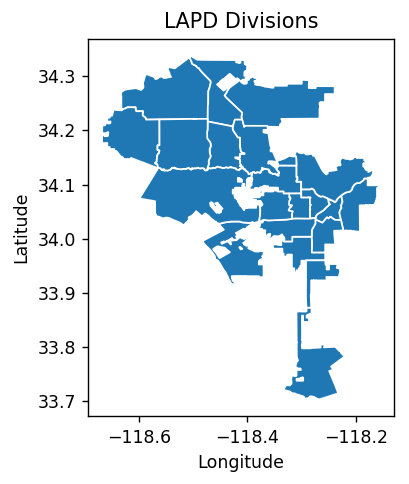

In [14]:
# plot map of LAPD divisons on longitude and latitude plot
plt.figure(dpi = 125)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("LAPD Divisions")
LAPDdiv_df.plot(ax = plt.gca(), edgecolor="1")

In [15]:
#merge LAPD shapefile dataframe with crimes percapita dataframe

LAPDdiv_df = LAPDdiv_df.set_index("name").join(cpc_df.set_index("name"))
LAPDdiv_df

,slug,set,kind,external_i,display_na,name_1,url,number,phone_numb,address,square_mil,geometry,count
name,,,,,,,,,,,,,
77th Street,77th-street-lapd-division,LAPD Divisions,LAPD Division,12,77th Street LAPD Division,None,http://www.lapdonline.org/77th_street_communit...,12,213-485-4164,7600 S. Broadway,11.3334694611,POLYGON ((-118.3148948951553 34.00371678060566...,0.729366
Central,central-lapd-division,LAPD Divisions,LAPD Division,1,Central LAPD Division,None,http://www.lapdonline.org/central_community_po...,1,213-485-3294,251 E. 6th St.,4.9051505769,POLYGON ((-118.2243816590658 34.06850962588265...,2.033400
Devonshire,devonshire-lapd-division,LAPD Divisions,LAPD Division,17,Devonshire LAPD Division,None,http://www.lapdonline.org/devonshire_community...,17,818-832-0633,10250 Etiwanda Ave.,48.310389692,POLYGON ((-118.4896378723103 34.31514263477411...,0.388143
Foothill,foothill-lapd-division,LAPD Divisions,LAPD Division,16,Foothill LAPD Division,None,http://www.lapdonline.org/foothill_community_p...,16,818-756-8861,12760 Osborne St.,46.5372672192,POLYGON ((-118.3829144583268 34.29425373977321...,0.384817
Harbor,harbor-lapd-division,LAPD Divisions,LAPD Division,5,Harbor LAPD Division,None,http://www.lapdonline.org/harbor_community_pol...,5,310-726-7700,2175 John S. Gibson Blvd.,32.0275914881,POLYGON ((-118.2815067203804 33.86634772230949...,0.474690
Hollenbeck,hollenbeck-lapd-division,LAPD Divisions,LAPD Division,4,Hollenbeck LAPD Division,None,http://www.lapdonline.org/hollenbeck_community...,4,323-342-4100,2111 E. 1st St.,15.5398083185,POLYGON ((-118.1766487515499 34.11222915167837...,0.337340
Hollywood,hollywood-lapd-division,LAPD Divisions,LAPD Division,6,Hollywood LAPD Division,None,http://www.lapdonline.org/hollywood_community_...,6,213-972-2971,1358 N. Wilcox Ave.,13.3377561414,POLYGON ((-118.3091817047329 34.12739268205956...,0.283267
Mission,mission-lapd-division,LAPD Divisions,LAPD Division,19,Mission LAPD Division,None,http://www.lapdonline.org/mission_community_po...,19,818-838-9800,11121 N. Sepulveda Blvd.,25.0940732236,POLYGON ((-118.4199900853765 34.32916473191149...,0.406909
Newton,newton-lapd-division,LAPD Divisions,LAPD Division,13,Newton LAPD Division,None,http://www.lapdonline.org/newton_community_pol...,13,323-846-6547,3400 S. Central Ave.,9.7701450586,POLYGON ((-118.2422842186189 34.03754056722302...,0.577773


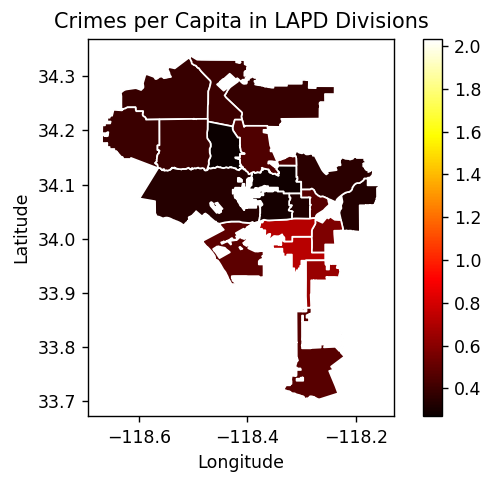

In [41]:
# plot merged dataframe
plt.figure(dpi = 125)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crimes per Capita in LAPD Divisions")
LAPDdiv_df.plot(column="count", ax = plt.gca(), cmap="hot", edgecolor="1", legend=True)

In [17]:
# create functions for accessing relevant dictionaries
def getCrimeDescription(code):
    """
    Returns crime description from dictionary
    
    code: crime code as an integer
    """
    crime_dict = {626: 'INTIMATE PARTNER - SIMPLE ASSAULT', 510: 'VEHICLE - STOLEN', 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 110: 'CRIMINAL HOMICIDE', 668: 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 440: 'THEFT PLAIN - PETTY ($950 & UNDER)', 763: 'STALKING', 442: 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 624: 'BATTERY - SIMPLE ASSAULT', 670: 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 649: 'DOCUMENT FORGERY / STOLEN FELONY', 480: 'BIKE - STOLEN', 210: 'ROBBERY', 821: 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 220: 'ATTEMPTED ROBBERY', 437: 'RESISTING ARREST', 888: 'TRESPASSING', 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 660: 'COUNTERFEIT', 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 647: 'THROWING OBJECT AT MOVING VEHICLE', 951: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER', 930: 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 330: 'BURGLARY FROM VEHICLE', 860: 'BATTERY WITH SEXUAL CONTACT', 946: 'OTHER MISCELLANEOUS CRIME', 310: 'BURGLARY', 343: 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 627: 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 850: 'INDECENT EXPOSURE', 237: 'CHILD NEGLECT (SEE 300 W.I.C.)', 625: 'OTHER ASSAULT', 350: 'THEFT, PERSON', 755: 'BOMB SCARE', 940: 'EXTORTION', 121: 'RAPE, FORCIBLE', 441: 'THEFT PLAIN - ATTEMPT', 331: 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 236: 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 886: 'DISTURBING THE PEACE', 813: 'CHILD ANNOYING (17YRS & UNDER)', 251: 'SHOTS FIRED AT INHABITED DWELLING', 623: 'BATTERY POLICE (SIMPLE)', 761: 'BRANDISH WEAPON', 943: 'CRUELTY TO ANIMALS', 815: 'SEXUAL PENETRATION W/FOREIGN OBJECT', 354: 'THEFT OF IDENTITY', 648: 'ARSON', 320: 'BURGLARY, ATTEMPTED', 420: 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 900: 'VIOLATION OF COURT ORDER', 956: 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 812: 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 410: 'BURGLARY FROM VEHICLE, ATTEMPTED', 434: 'FALSE IMPRISONMENT', 662: 'BUNCO, GRAND THEFT', 351: 'PURSE SNATCHING', 901: 'VIOLATION OF RESTRAINING ORDER', 122: 'RAPE, ATTEMPTED', 664: 'BUNCO, PETTY THEFT', 910: 'KIDNAPPING', 762: 'LEWD CONDUCT', 933: 'PROWLER', 520: 'VEHICLE - ATTEMPT STOLEN', 805: 'PIMPING', 840: 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 932: 'PEEPING TOM', 810: 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 485: 'BIKE - ATTEMPTED STOLEN', 450: 'THEFT FROM PERSON - ATTEMPT', 352: 'PICKPOCKET', 438: 'RECKLESS DRIVING', 820: 'ORAL COPULATION', 928: 'THREATENING PHONE CALLS/LETTERS', 444: 'DISHONEST EMPLOYEE - PETTY THEFT', 661: 'UNAUTHORIZED COMPUTER ACCESS', 753: 'DISCHARGE FIREARMS/SHOTS FIRED', 922: 'CHILD STEALING', 653: 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 433: 'DRIVING WITHOUT OWNER CONSENT (DWOC)', 666: 'BUNCO, ATTEMPT', 942: 'BRIBERY', 654: 'CREDIT CARDS, FRAUD USE ($950 & UNDER', 756: 'WEAPONS POSSESSION/BOMBING', 235: 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 231: 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 443: 'SHOPLIFTING - ATTEMPT', 949: 'ILLEGAL DUMPING', 920: 'KIDNAPPING - GRAND ATTEMPT', 452: 'PICKPOCKET, ATTEMPT', 451: 'PURSE SNATCHING - ATTEMPT', 421: 'THEFT FROM MOTOR VEHICLE - ATTEMPT', 622: 'BATTERY ON A FIREFIGHTER', 651: 'DOCUMENT WORTHLESS ($200.01 & OVER)', 890: 'FAILURE TO YIELD', 902: 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 439: 'FALSE POLICE REPORT', 345: 'DISHONEST EMPLOYEE - GRAND THEFT', 952: 'ABORTION/ILLEGAL', 954: 'CONTRIBUTING', 950: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400', 353: 'DRUNK ROLL', 474: 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 487: 'BOAT - STOLEN', 880: 'DISRUPT SCHOOL', 882: 'INCITING A RIOT', 884: 'FAILURE TO DISPERSE', 806: 'PANDERING', 471: 'TILL TAP - PETTY ($950 & UNDER)', 436: 'LYNCHING - ATTEMPTED', 944: 'CONSPIRACY', 931: 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 870: 'CHILD ABANDONMENT', 924: 'TELEPHONE PROPERTY - DAMAGE', 903: 'CONTEMPT OF COURT', 865: 'DRUGS, TO A MINOR', 250: 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 347: 'GRAND THEFT / INSURANCE FRAUD', 473: 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 349: 'GRAND THEFT / AUTO REPAIR', 446: 'PETTY THEFT - AUTO REPAIR', 435: 'LYNCHING', 113: 'MANSLAUGHTER, NEGLIGENT', 948: 'BIGAMY', 472: 'TILL TAP - ATTEMPT', 470: 'TILL TAP - GRAND THEFT ($950.01 & OVER)', 822: 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 453: 'DRUNK ROLL - ATTEMPT', 475: 'THEFT, COIN MACHINE - ATTEMPT', 652: 'DOCUMENT WORTHLESS ($200 & UNDER)', 760: 'LEWD/LASCIVIOUS ACTS WITH CHILD', 921: 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 814: 'CHILD PORNOGRAPHY', 445: 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 830: 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 432: 'BLOCKING DOOR INDUCTION CENTER', 926: 'TRAIN WRECKING', 906: 'FIREARMS RESTRAINING ORDER (FIREARMS RO)'}
    return crime_dict[code]

def getCrimeCode(description):
    """
    Returns crime code from dictionary
    
    description: Crime Description as a String
    """
    code_dict = {626: 'INTIMATE PARTNER - SIMPLE ASSAULT', 510: 'VEHICLE - STOLEN', 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 110: 'CRIMINAL HOMICIDE', 668: 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 440: 'THEFT PLAIN - PETTY ($950 & UNDER)', 763: 'STALKING', 442: 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 624: 'BATTERY - SIMPLE ASSAULT', 670: 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 649: 'DOCUMENT FORGERY / STOLEN FELONY', 480: 'BIKE - STOLEN', 210: 'ROBBERY', 821: 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 220: 'ATTEMPTED ROBBERY', 437: 'RESISTING ARREST', 888: 'TRESPASSING', 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 660: 'COUNTERFEIT', 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 647: 'THROWING OBJECT AT MOVING VEHICLE', 951: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER', 930: 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 330: 'BURGLARY FROM VEHICLE', 860: 'BATTERY WITH SEXUAL CONTACT', 946: 'OTHER MISCELLANEOUS CRIME', 310: 'BURGLARY', 343: 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 627: 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 850: 'INDECENT EXPOSURE', 237: 'CHILD NEGLECT (SEE 300 W.I.C.)', 625: 'OTHER ASSAULT', 350: 'THEFT, PERSON', 755: 'BOMB SCARE', 940: 'EXTORTION', 121: 'RAPE, FORCIBLE', 441: 'THEFT PLAIN - ATTEMPT', 331: 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 236: 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 886: 'DISTURBING THE PEACE', 813: 'CHILD ANNOYING (17YRS & UNDER)', 251: 'SHOTS FIRED AT INHABITED DWELLING', 623: 'BATTERY POLICE (SIMPLE)', 761: 'BRANDISH WEAPON', 943: 'CRUELTY TO ANIMALS', 815: 'SEXUAL PENETRATION W/FOREIGN OBJECT', 354: 'THEFT OF IDENTITY', 648: 'ARSON', 320: 'BURGLARY, ATTEMPTED', 420: 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 900: 'VIOLATION OF COURT ORDER', 956: 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 812: 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 410: 'BURGLARY FROM VEHICLE, ATTEMPTED', 434: 'FALSE IMPRISONMENT', 662: 'BUNCO, GRAND THEFT', 351: 'PURSE SNATCHING', 901: 'VIOLATION OF RESTRAINING ORDER', 122: 'RAPE, ATTEMPTED', 664: 'BUNCO, PETTY THEFT', 910: 'KIDNAPPING', 762: 'LEWD CONDUCT', 933: 'PROWLER', 520: 'VEHICLE - ATTEMPT STOLEN', 805: 'PIMPING', 840: 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 932: 'PEEPING TOM', 810: 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 485: 'BIKE - ATTEMPTED STOLEN', 450: 'THEFT FROM PERSON - ATTEMPT', 352: 'PICKPOCKET', 438: 'RECKLESS DRIVING', 820: 'ORAL COPULATION', 928: 'THREATENING PHONE CALLS/LETTERS', 444: 'DISHONEST EMPLOYEE - PETTY THEFT', 661: 'UNAUTHORIZED COMPUTER ACCESS', 753: 'DISCHARGE FIREARMS/SHOTS FIRED', 922: 'CHILD STEALING', 653: 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 433: 'DRIVING WITHOUT OWNER CONSENT (DWOC)', 666: 'BUNCO, ATTEMPT', 942: 'BRIBERY', 654: 'CREDIT CARDS, FRAUD USE ($950 & UNDER', 756: 'WEAPONS POSSESSION/BOMBING', 235: 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 231: 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 443: 'SHOPLIFTING - ATTEMPT', 949: 'ILLEGAL DUMPING', 920: 'KIDNAPPING - GRAND ATTEMPT', 452: 'PICKPOCKET, ATTEMPT', 451: 'PURSE SNATCHING - ATTEMPT', 421: 'THEFT FROM MOTOR VEHICLE - ATTEMPT', 622: 'BATTERY ON A FIREFIGHTER', 651: 'DOCUMENT WORTHLESS ($200.01 & OVER)', 890: 'FAILURE TO YIELD', 902: 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 439: 'FALSE POLICE REPORT', 345: 'DISHONEST EMPLOYEE - GRAND THEFT', 952: 'ABORTION/ILLEGAL', 954: 'CONTRIBUTING', 950: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400', 353: 'DRUNK ROLL', 474: 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 487: 'BOAT - STOLEN', 880: 'DISRUPT SCHOOL', 882: 'INCITING A RIOT', 884: 'FAILURE TO DISPERSE', 806: 'PANDERING', 471: 'TILL TAP - PETTY ($950 & UNDER)', 436: 'LYNCHING - ATTEMPTED', 944: 'CONSPIRACY', 931: 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 870: 'CHILD ABANDONMENT', 924: 'TELEPHONE PROPERTY - DAMAGE', 903: 'CONTEMPT OF COURT', 865: 'DRUGS, TO A MINOR', 250: 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 347: 'GRAND THEFT / INSURANCE FRAUD', 473: 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 349: 'GRAND THEFT / AUTO REPAIR', 446: 'PETTY THEFT - AUTO REPAIR', 435: 'LYNCHING', 113: 'MANSLAUGHTER, NEGLIGENT', 948: 'BIGAMY', 472: 'TILL TAP - ATTEMPT', 470: 'TILL TAP - GRAND THEFT ($950.01 & OVER)', 822: 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 453: 'DRUNK ROLL - ATTEMPT', 475: 'THEFT, COIN MACHINE - ATTEMPT', 652: 'DOCUMENT WORTHLESS ($200 & UNDER)', 760: 'LEWD/LASCIVIOUS ACTS WITH CHILD', 921: 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 814: 'CHILD PORNOGRAPHY', 445: 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 830: 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 432: 'BLOCKING DOOR INDUCTION CENTER', 926: 'TRAIN WRECKING', 906: 'FIREARMS RESTRAINING ORDER (FIREARMS RO)'}
    des_dict = {value:key for key,value in code_dict.items()}
    return des_dict[description]

def getCrimeCountDict(area):
    crime_count = {'77th Street': 127639, 'Olympic': 82403, 'Southeast': 96801, 'Topanga': 85297, 'Central': 81336, 'Northeast': 88199, 'Foothill': 70119, 'Mission': 91900, 'Van Nuys': 87555, 'Newton': 86666, 'North Hollywood': 99760, 'West Valley': 78438, 'Pacific': 97484, 'Devonshire': 85056, 'Rampart': 77784, 'Southwest': 118406, 'Hollenbeck': 67468, 'Harbor': 81172, 'Hollywood': 84980, 'West Los Angeles': 77221, 'Wilshire': 75521}
    return crime_count[area]

## Data Analysis On West Los Angeles

In [18]:
# Create pandas dataframe of crime data in West Los Angeles
westLA_df = crime_df.loc[crime_df["Area Name"] == "West LA"]

In [19]:
print("West LA Crime Data Frame Dimensions: " + str(westLA_df.shape))
westLA_df.head()

West LA Crime Data Frame Dimensions: (77221, 26)


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
43452,130600978,10/28/2013,10/24/2013,1800,8,West LA,809,956,"LETTERS, LEWD",NaN,...,NaN,IC,Invest Cont,956.0,998.0,NaN,NaN,9600 ARROWOOD DR,NaN,"(34.1069, -118.4055)"
54892,100812018,07/02/2010,07/02/2010,1620,8,West LA,853,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,SANTA MONICA,BUTLER,"(34.0456, -118.4519)"
56208,100811779,06/26/2010,06/26/2010,1700,8,West LA,885,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,10400 NORTHVALE RD,NaN,"(34.033, -118.414)"
57366,130809477,05/17/2013,05/17/2013,1545,8,West LA,835,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,MISSISSIPPI,WESTWOOD,"(34.0453, -118.4329)"
57467,130810980,06/27/2013,06/27/2013,250,8,West LA,849,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,HOLT,PICO,"(34.0538, -118.3785)"


### Crime Occurrences in the last 10 Years in West Los Angeles

BURGLARY                                                        8021
BURGLARY FROM VEHICLE                                           7769
THEFT PLAIN - PETTY ($950 & UNDER)                              6942
THEFT OF IDENTITY                                               6830
BATTERY - SIMPLE ASSAULT                                        5817
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036    4695
VEHICLE - STOLEN                                                3555
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                 3553
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    3244
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        3198
Name: Crime Code Description, dtype: int64

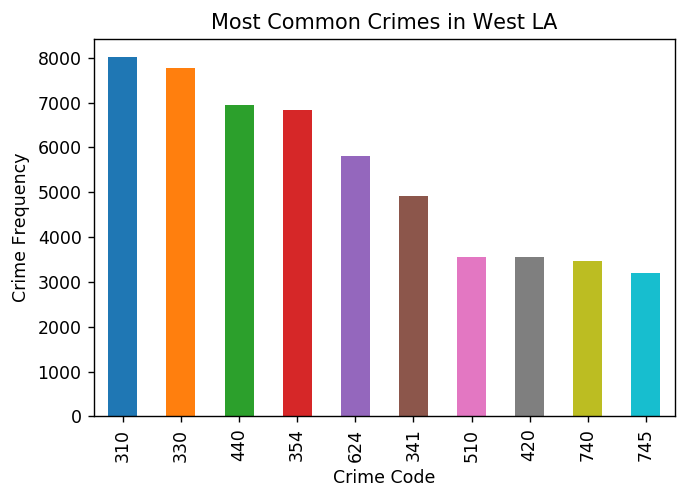

In [21]:
plt.figure(dpi = 125)
plt.xlabel("Crime Code")
plt.ylabel("Crime Frequency")
plt.title("Most Common Crimes in West LA")
westLA_df["Crime Code"].value_counts()[0:10].plot(kind='bar', ax = plt.gca())
westLA_df["Crime Code Description"].value_counts()[0:10]

# Most Affected Age Groups

The distribution of crime victim age in West Los Angeles is unimodal and is slightly skewed right.

In [22]:
# get relevant statistics on victim age distrubtion
westLA_df["Victim Age"].describe()

count    71678.000000
mean        40.603449
std         17.935536
min         10.000000
25%         27.000000
50%         39.000000
75%         53.000000
max         99.000000
Name: Victim Age, dtype: float64

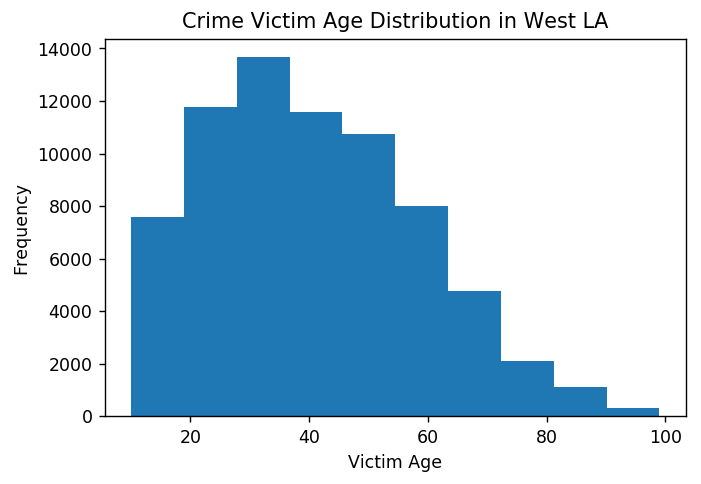

In [23]:
# plot victim age distribution 
plt.figure(dpi = 125)
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.title("Crime Victim Age Distribution in West LA")
westLA_df["Victim Age"].plot(kind="hist", ax = plt.gca())

# Additional Insights and Inference

## Trends Since 2010 in West Los Angeles

## Machine Learning for Predicting Crime

Predict the most likely crime to happen from coordinates, age, and time.